In [ ]:
!git clone https://github.com/MyungKyuYi/AI-class.git

Cloning into 'AI-class'...
remote: Enumerating objects: 352, done.
remote: Counting objects: 100% (68/68), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 352 (delta 53), reused 23 (delta 23), pack-reused 284 (from 1)
Receiving objects: 100% (352/352), 32.65 MiB | 12.04 MiB/s, done.
Resolving deltas: 100% (163/163), done.
Updating files: 100% (60/60), done.


In [4]:
 from tensorflow.keras import layers, models

In [19]:
from google.colab import files
uploaded = files.upload()

Saving winequality-white.csv to winequality-white (1).csv


In [20]:
import pandas as pd

# 파일 경로를 지정합니다.
file_path = 'winequality-white.csv'

# pd.read_csv를 사용하되, delimiter=';' 옵션을 추가하여
# 세미콜론을 기준으로 데이터를 나누도록 설정합니다.
df = pd.read_csv(file_path, delimiter=';')

# 데이터가 잘 나뉘었는지 확인하기 위해 상위 5개 행을 출력합니다.
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [21]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [22]:
#타겟 데이터에 결측값이 있나 확인하기
df["quality"].value_counts()

,count
quality,
6,2198
5,1457
7,880
8,175
4,163
3,20
9,5


In [23]:
#결측치 확인하기
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [24]:
#결측치를 제거하는 과정
df = df.dropna()
df.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [25]:
# 모든 레이블을 숫자로 변형 -> 머신러닝은 문자로 된 데이터는 읽지 못한다.
#여기서는 이미 모든 레이블이 숫자이므로 생략하도록한다(연속적인 데이터 값이 왜곡될 수가 있음)

#from sklearn.preprocessing import LabelEncoder

#label_encoders = {}
#for column in df.columns:
#    label_encoders[column] = LabelEncoder()
#    df[column] = label_encoders[column].fit_transform(df[column])

In [26]:
#타겟 데이터로 사용할 quality 제외
input = df.drop(columns=["quality"])

#quality을 타겟 데이터로 선택
target = df["quality"]

In [28]:
input

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9
...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8


In [29]:
from sklearn.preprocessing import StandardScaler

X = input

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [32]:
Y = target

Y = pd.get_dummies(Y).values

#X는 이미 넘파이 배열임
#X = X.values

In [ ]:
#X가 input이고 Y가 target이다.

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

In [34]:
#x.shape[1]은 특징의 수 이다. -> 직접 특징의 수를 세어서 적어도 됨
#y.shape는 최종 분류할 때 클래스의  개수이다. -> 직접 분류할 클래스의 개수를 세어서 적어도 됨
model = models.Sequential([
    layers.Dense(64, activation="relu", input_shape=(X.shape[1],)),
    #layers.Dropout(0.3),
    layers.Dense(32, activation="relu"),
    layers.Dense(Y.shape[1], activation="softmax")   # 클래스 수 맞춤
])

model.compile(
    optimizer="adam",
    loss="categorical_crossentropy",   # one-hot이면 categorical_crossentropy
    metrics=["accuracy"]
)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [35]:
print(X.shape, Y.shape)

(4898, 11) (4898, 7)


In [36]:
#검증 세트를 편리하게 만듬
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    verbose=1
)

Epoch 1/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.3611 - loss: 1.5671 - val_accuracy: 0.5038 - val_loss: 1.1563
Epoch 2/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5526 - loss: 1.1253 - val_accuracy: 0.5459 - val_loss: 1.0870
Epoch 3/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5653 - loss: 1.0715 - val_accuracy: 0.5370 - val_loss: 1.0647
Epoch 4/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5790 - loss: 1.0241 - val_accuracy: 0.5638 - val_loss: 1.0414
Epoch 5/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5845 - loss: 1.0170 - val_accuracy: 0.5446 - val_loss: 1.0356
Epoch 6/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5940 - loss: 0.9992 - val_accuracy: 0.5548 - val_loss: 1.0241
Epoch 7/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5885 - loss: 0.9603 - val_accuracy: 0.5727 - val_loss: 1.0198
Epoch 8/50
196/196 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5878 - loss: 0.9889 - val_accuracy: 0.

In [37]:
import numpy as np
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step


In [38]:
# 학습 곡선
loss = history.history['loss']
val_loss = history.history['val_loss']
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

In [39]:
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


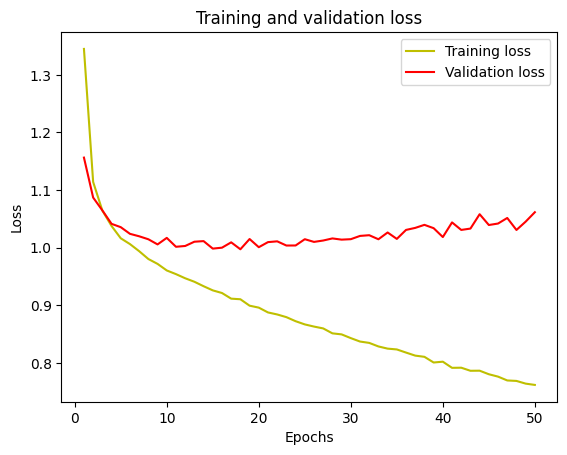

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

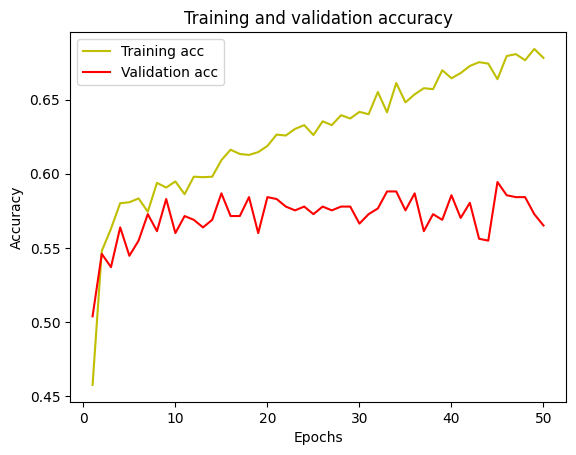

In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Accuracy of the predicted values
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.25      0.10      0.15        29
           2       0.55      0.46      0.50       291
           3       0.53      0.68      0.59       441
           4       0.50      0.41      0.45       182
           5       0.43      0.18      0.26        33
           6       0.00      0.00      0.00         1

    accuracy                           0.53       980
   macro avg       0.32      0.26      0.28       980
weighted avg       0.52      0.53      0.51       980

[[  0   1   2   0   0   0   0]
 [  0   3  16   9   1   0   0]
 [  0   5 133 146   7   0   0]
 [  0   3  78 298  59   3   0]
 [  0   0  11  91  75   5   0]
 [  0   0   1  18   8   6   0]
 [  0   0   0   1   0   0   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
